In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


# Task 1: Following the example of Chapter 8 (Geron book), load the MNIST dataset (introduced in Chapter 3), to do a PCA compression for the MNIST dataset while preserving 85% of its variance. How are results different from presented in Chapter 8?

In [2]:
# fetch MNIST dataset from OpenML.org
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ac7407/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `

# Since MNIST contains images, we must convert to a NumPy array.

In [3]:
# convert data as numpy array
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
# perform PCA compression with MNIST dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

# PCA compression reduces the dimensionality of the dataset to 2 dimensions. 

In [5]:
# calculate explained variance ratio
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

# Explained variance ratio is the percentage of variance attributed by each of the selected components.

# As seen from above, ~9% of the data's variance lies in the first principal component (PC), and ~7% lies in the second PC. 

# Thus, we must choose the right number of dimensions to analyze this data.

In [6]:
# load MNIST dataset again and perform PCA w/o reducing dimensionality
# computes minimum amount of dimensions needed to preserve 85% of training set's variance
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.85) + 1 # d equals 59

/home/ac7407/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
# set number of PCs to be a float between 0.0 and 1.0 (0.85)
pca = PCA(n_components=0.85)
X_reduced = pca.fit_transform(X_train)

In [8]:
# print actual number of components during training
pca.n_components_

59

# Alternatively, the number of components can be found by plotting explained variance as a function of the number of dimensions.

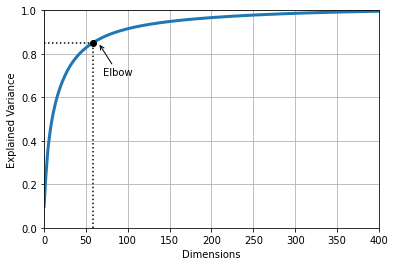

In [9]:
# plot explained variance as a function of the number of dimensions
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.85], "k:")
plt.plot([0, d], [0.85, 0.85], "k:")
plt.plot(d, 0.85, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
plt.show()

# PCA for Compression

In [10]:
# decompress the reduced MNIST dataset back to 784 dimensions
X_recovered = pca.inverse_transform(X_reduced)

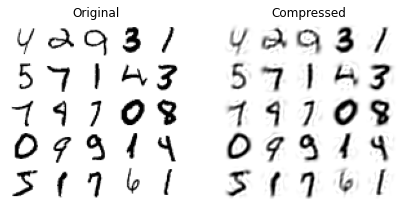

In [11]:
# compare and contrast original and compressed MNIST images
plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(['Original', 'Compressed'][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap='binary',
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5 ])
            plt.axis("off")

# What is the point of doing dimension reduction using PCA?

## Main idea is that developers want to work with massive datasets to perform data visualization/analysis. However, at a certain point, more features and dimensions can decrease a model's accuracy because there is more data to be generalized. -- CURSE OF DIMENSIONALITY

## Therefore, dimension reduction reduces complexity of a model and avoids overfitting. We choose to use PCA specifically because it is an unsupervised linear transformation technique. 

## How it works is that it finds the axis of the maximum variance in the training set. It also finds a second axis orthogonal to the first one and that accounts for the largest amount of the remaining variance. For higher dimensions, PCA finds a third, fourth (and so on) axes that will be orthogonal to the previous axes.

# Lastly, compared with preserving 95% variance from training set, preserving 85% results in a lesser number of components during training (59 vs. 154). 

# According to the graph, just using 59 components does not really lose too much explained variance, however this point is just right at the elbow. Therefore, going below the elbow will cause explained variance to be lost significantly faster.

# Comparison with the results on Chapter 8 (original vs. compressed images of MNIST dataset) still results in quality loss but the digits are still mostly intact.

# Task 2: Split MINST into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 85%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test sets: how does it compare to the previous classifier? How are the results different from those with an explained variance ratio of 95%?

In [15]:
# split MNIST dataset into training and test sets using train_test_split()
# training set 60000, test set 10000
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

/home/ac7407/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [17]:
# confirm size of training set and test sets
print("Training set size: ", len(X_train))
print("Test set size: ", len(X_test))

Training set size:  60000
Test set size:  10000


In [18]:
# train random forest classifier and time it
from sklearn.ensemble import RandomForestClassifier
import time

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
start = time.time()
rnd_clf.fit(X_train, y_train)
end = time.time()
print("Training time: ", end - start)

Training time:  31.172847747802734


In [19]:
# evaluate the classifier on the test set
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9674

In [20]:
# use PCA to reduce dimensionality while preserving 85% of the training set's variance
pca = PCA(n_components=0.85)
X_reduced = pca.fit_transform(X_train)

# confirm 59 dimensions
pca.n_components_

59

In [21]:
# train a new random forest classifier on the reduced dataset
rnd_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
start = time.time()
rnd_clf2.fit(X_reduced, y_train)
end = time.time()
print("Training time: ", end - start)

Training time:  51.83350443840027


# Using a PCA to reduce dimensionality increases training time.

In [22]:
# evaluate new classifier on the test set
y_pred = rnd_clf2.predict(pca.transform(X_test))
accuracy_score(y_test, y_pred)

0.9511

# The accuracy score is slightly lower than the old random forest model without reducing dimensions.

# Repeat but this time use 95% explained variance ratio.

In [25]:
# train a new random forest classifier on the reduced dataset
rnd_clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
start = time.time()
rnd_clf3.fit(X_reduced, y_train)
end = time.time()
print("Training time: ", end - start)

Training time:  87.7238256931305


# The training time is even slower than 85% explained variance ratio.

In [26]:
# evaluate new classifier on the test set
y_pred = rnd_clf3.predict(pca.transform(X_test))
accuracy_score(y_test, y_pred)

0.9469

# With a higher variance ratio, it appears that the accuracy of the random forest model will decrease, though in slight amounts.

# Task 3: Use t-SNE to reduce the MNIST  Test dataset down to two dimensions and plot the result using Matplotlib.

# What is t-SNE?

## t-SNE is also a method to reduce dimensionality while trying to keep similar instances close and non-similar instances apart. This is mostly used for visualization.

## Note: will limit to first 5000 images of MNIST to save time.

In [31]:
X_test, y_test = mnist.data[:5000], mnist.target[:5000]
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced = tsne.fit_transform(X_train)

## Part 1: Using a scatterplot using 10 different colors to represent each image's target class.  Separately, instead of using t-SNE,  using PCA to reduce down to two dimensions, and compare the resulting visualizations.

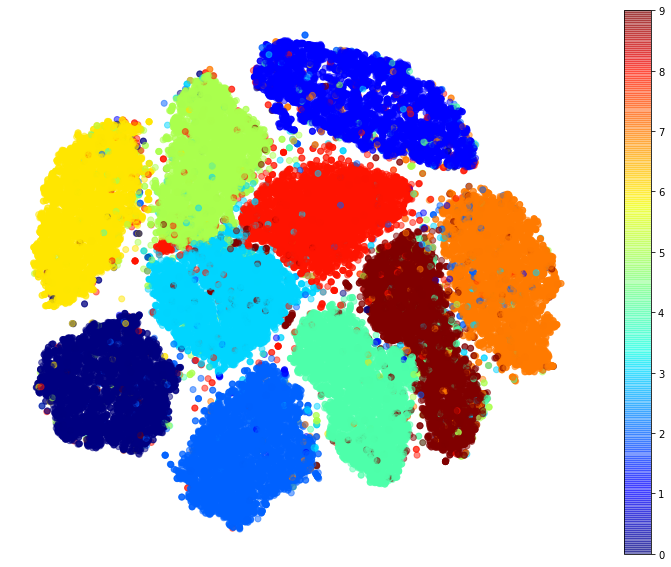

In [32]:
# plot the dataset
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_train.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis("off")
plt.colorbar()
plt.show()

In [33]:
# use PCA to reduce MNIST dataset to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

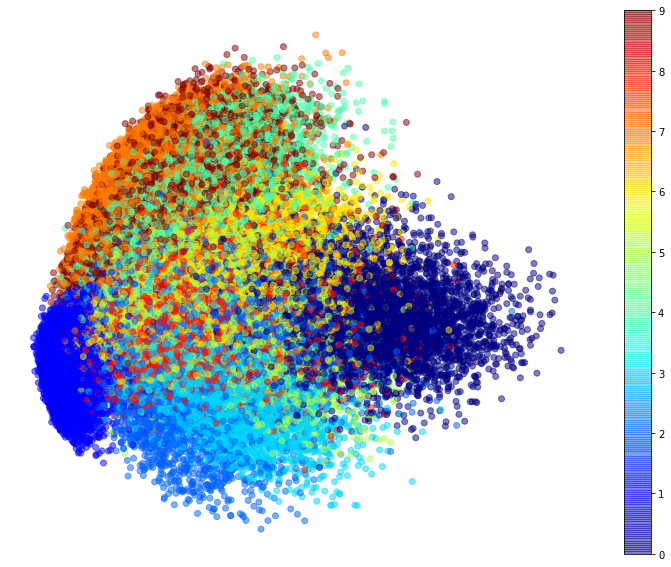

In [34]:
# plot the dataset
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_train.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis("off")
plt.colorbar()
plt.show()

# Based on the results, PCA does not do a good job separating each digit. 

## Part 2: Using a scatterplot using 5 different colors to represent each image's target class for odd numbers.

In [37]:
tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced = tsne.fit_transform(X_train)

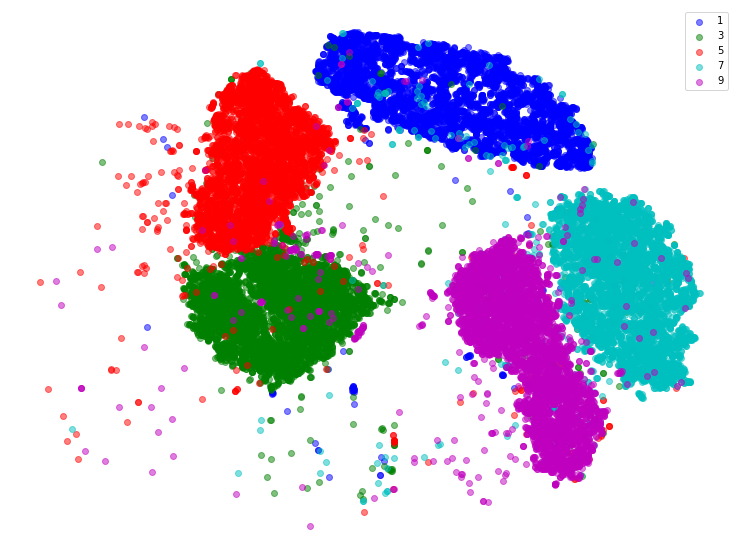

In [40]:
# plot only odd numbers
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[y_train == "1", 0], X_reduced[y_train == "1", 1],
            c="b", label="1", alpha=0.5)
plt.scatter(X_reduced[y_train == "3", 0], X_reduced[y_train == "3", 1],
            c="g", label="3", alpha=0.5)
plt.scatter(X_reduced[y_train == "5", 0], X_reduced[y_train == "5", 1],
            c="r", label="5", alpha=0.5)
plt.scatter(X_reduced[y_train == "7", 0], X_reduced[y_train == "7", 1],
            c="c", label="7", alpha=0.5)
plt.scatter(X_reduced[y_train == "9", 0], X_reduced[y_train == "9", 1],
            c="m", label="9", alpha=0.5)
plt.legend()
plt.axis("off")
plt.show()

In [41]:
# use PCA to reduce MNIST dataset to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

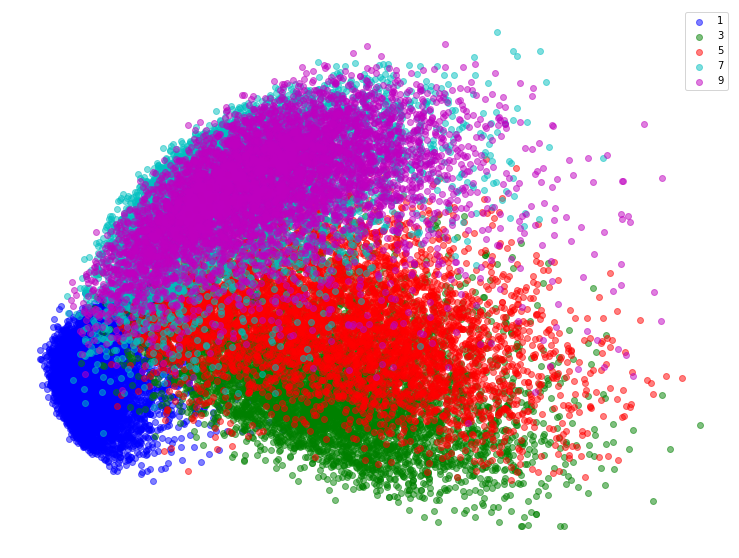

In [42]:
# plot only odd numbers
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[y_train == "1", 0], X_reduced[y_train == "1", 1],
            c="b", label="1", alpha=0.5)
plt.scatter(X_reduced[y_train == "3", 0], X_reduced[y_train == "3", 1],
            c="g", label="3", alpha=0.5)
plt.scatter(X_reduced[y_train == "5", 0], X_reduced[y_train == "5", 1],
            c="r", label="5", alpha=0.5)
plt.scatter(X_reduced[y_train == "7", 0], X_reduced[y_train == "7", 1],
            c="c", label="7", alpha=0.5)
plt.scatter(X_reduced[y_train == "9", 0], X_reduced[y_train == "9", 1],
            c="m", label="9", alpha=0.5)
plt.legend()
plt.axis("off")
plt.show()

# Once again, we see that only trying PCA results in not so good separation of the odd values in the MNIST dataset.

## Part 3: Trying PCA first to reduce  the dataset’s dimensionality, with an explained variance ratio of 85% and then t-SNE .  Using a scatterplot using 5 different colors to represent each image's target class for odd numbers.

In [43]:
# use PCA to reduce dimensionality to explained variance of 85%
pca = PCA(n_components=0.85)
X_reduced = pca.fit_transform(X_train)

In [44]:
# then, use t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced = tsne.fit_transform(X_reduced)

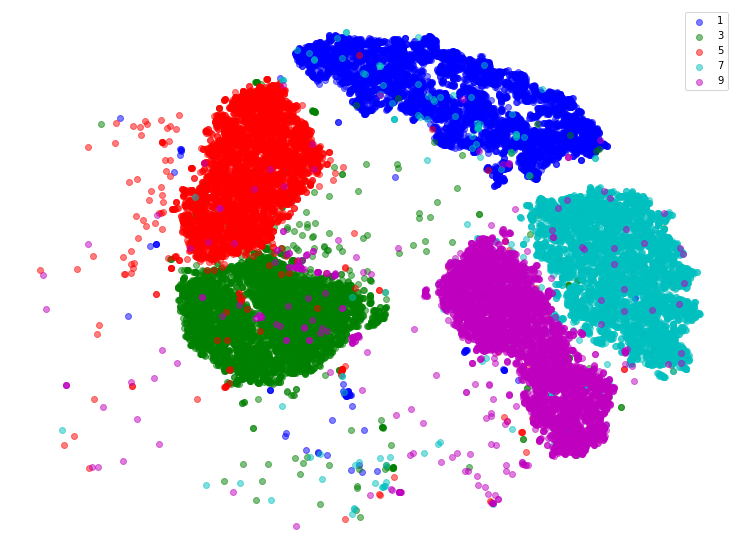

In [45]:
# plot only odd numbers
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[y_train == "1", 0], X_reduced[y_train == "1", 1],
            c="b", label="1", alpha=0.5)
plt.scatter(X_reduced[y_train == "3", 0], X_reduced[y_train == "3", 1],
            c="g", label="3", alpha=0.5)
plt.scatter(X_reduced[y_train == "5", 0], X_reduced[y_train == "5", 1],
            c="r", label="5", alpha=0.5)
plt.scatter(X_reduced[y_train == "7", 0], X_reduced[y_train == "7", 1],
            c="c", label="7", alpha=0.5)
plt.scatter(X_reduced[y_train == "9", 0], X_reduced[y_train == "9", 1],
            c="m", label="9", alpha=0.5)
plt.legend()
plt.axis("off")
plt.show()

# Combining the two methods together will yield a slightly better separation than just t-SNE.